# **Tugas SSD Metode Klasifikasi**


# **Metode Regresi Logistik**

In [ ]:
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_excel('data.xlsx')
df.head(2)

,tanggungan,pendapatan,Usia,Status
0,6,10.0,39,Bad
1,1,9.0,49,Bad


In [ ]:
df.describe()

,tanggungan,pendapatan,Usia
count,100.000000,100.000000,100.000000
mean,1.890000,9.387000,46.230000
std,1.294081,4.206816,8.428972
min,0.000000,2.400000,30.000000
25%,1.000000,6.500000,39.000000
50%,2.000000,9.000000,46.000000
75%,3.000000,11.800000,54.000000
max,6.000000,28.000000,60.000000


In [ ]:
df.isnull().values.any().sum()
df=df.replace({'Status':{'Bad':1, 'Good':0}})
df.head(2)

,tanggungan,pendapatan,Usia,Status
0,6,10.0,39,1
1,1,9.0,49,1


**Buat regresi logistik dengan Python**

*Atur variabel independen (direpresentasikan sebagai X) dan variabel dependen (direpresentasikan sebagai y):*

In [ ]:
X = df[['tanggungan', 'pendapatan','Usia']]
y = df['Status']

*Terapkan train_test_split. Misalnya, Anda dapat mengatur ukuran tes ke 0,25, dan karena itu pengujian model akan didasarkan pada 25% dari dataset, sedangkan pelatihan model akan didasarkan pada 75% dari dataset:*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

*Terapkan regresi logistik sebagai berikut:*

In [ ]:
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

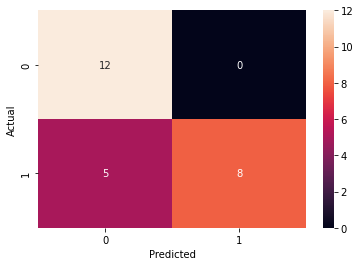

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

*Untuk bagian terakhir, cetak Akurasi dan plot Confusion Matrix:*

In [ ]:
print (X_test) 
print (y_pred)

    tanggungan  pendapatan  Usia
26           3        16.4    53
86           0        11.4    58
2            2         4.8    35
55           0         8.4    47
75           0        10.1    39
93           1         6.5    40
16           1         7.8    48
73           1        10.5    30
54           0        14.1    50
95           1        14.2    54
53           2        10.1    50
92           1        28.0    56
78           2        13.1    57
13           2         6.8    40
7            2         4.9    56
30           1         9.0    37
22           1         7.8    34
24           0         7.4    45
33           2         6.4    58
8            4         8.0    35
43           1         5.2    49
62           1        11.9    42
3            0         4.9    52
71           0        12.5    53
45           1         6.5    49
[0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1]


In [ ]:
print('Akurasi: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Akurasi:  0.7


In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.90      0.69      0.78        13

    accuracy                           0.80        25
   macro avg       0.82      0.80      0.80        25
weighted avg       0.82      0.80      0.80        25

0.8


# **Metode Linear Diskriminan**

Linier Discriminant Linear (LDA) atau analisis diskriminan linier adalah generalisasi Diskriminan Linear Fisher, yaitu sebuah metode yang digunakan dalam ilmu statistika, dalam pengenalan pola dan pembelajaran mesin untuk mencari kombinasi linier fitur yang menjadi ciri atau yang memisahkan dua atau beberapa objek atau wisata (Wikipedia).

Linear Discriminan Linear (LDA) berfungsi jika pengukuran yang dilakukan terhadap variabel-variabel independen untuk setiap pengamatan merupakan kuantitas yang kontinu.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import style
style.use('fivethirtyeight')
import seaborn as sns


import data set serta menerapkan dummy variebel untuk kolom "Status", yang dimana untuk nilai "bad" = 1 dan untuk nilai "good" = 0

In [ ]:
# Importing the dataset
df= pd.read_csv('data_bad_good.csv')
df.isnull().values.any().sum()
df=df.replace({'Status':{'Bad':1, 'Good':0}})
df.head()

,Observasi,Tanggungan,Pendapatan,Usia,Status,Skor,Status pada fisher
0,1,6,10,39,1,"-243,095",bad
1,2,1,9,49,1,"-422,392",good
2,3,2,"4,8",35,1,"-201,561",bad
3,4,0,"4,9",52,1,"-332,358",bad
4,5,1,"4,7",34,1,"-23,092",bad


In [ ]:
df.describe()

,tanggungan,pendapatan,Usia,Status
count,100.000000,100.000000,100.000000,100.000000
mean,1.890000,9.387000,46.230000,0.470000
std,1.294081,4.206816,8.428972,0.501614
min,0.000000,2.400000,30.000000,0.000000
25%,1.000000,6.500000,39.000000,0.000000
50%,2.000000,9.000000,46.000000,0.000000
75%,3.000000,11.800000,54.000000,1.000000
max,6.000000,28.000000,60.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tanggungan  100 non-null    int64  
 1   pendapatan  100 non-null    float64
 2   Usia        100 non-null    int64  
 3   Status      100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


Menentukan nilai X dan Y

1.   X = kolom 1 sampai 3
2.   Y = kolom 4



In [ ]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 3].values

Menentukan data training dan data Test, dimana untuk data training 30 % dan data test 70 %

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Melakukan Normalisasi Data

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Melakukan Pemodelan untuk data, dengan model Linear Diskriminan Analisis

In [ ]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
print(" {} lda score: {} ".format(1,lda.score(X_test,y_test)))

 1 lda score: 0.7 


In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
predictions=lda.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.69      0.64      0.67        14

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30

0.7


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  4],
       [ 5,  9]])

Melakukan Visualisasi untuk hasil Linear Diskriminan Analisis

In [ ]:
df1 = pd.DataFrame(X_train)
df2 = pd.DataFrame(y_train)


In [ ]:
dat= pd.merge(df1, df2, left_index= True, right_index= True)
dat

,0_x,0_y
0,-0.009903,0
1,0.413056,0
2,1.209854,0
3,-0.723349,0
4,-1.462332,0
...,...,...
65,-0.942544,0
66,-1.494609,0
67,-0.942544,0
68,-2.879116,0


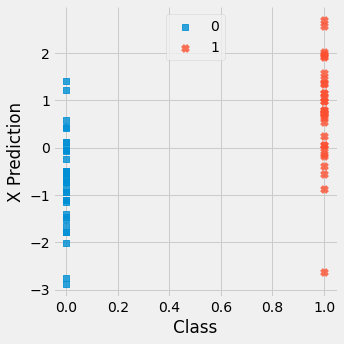

In [ ]:
markers = ['s', 'x']
colors = ['r', 'b']
vs=sns.lmplot(x='0_y', y='0_x', data=dat, markers=markers,fit_reg=False, hue='0_y', legend=False)
plt.legend(loc='upper center')
vs.set_xlabels("Class")
vs.set_ylabels("X Prediction")
plt.show()

**Kesimpulan**

Dari plot dapat kita lihat terjadi penyebaran yang sangat jelas antara kelas satu dengan yang lain. Berdasarkan analisis berikut ini, didapatkan akurasi dengan tingkat sekitar 73 %

# **Metode K-Nearest Neighbor (KNN)**

Dalam statistik, algoritma k-nearest neighbor (k-NN) adalah metode pembelajaran mesin non-parametrik yang pertama kali dikembangkan oleh Evelyn Fix dan Joseph Hodges pada tahun 1951, dan kemudian diperluas oleh Thomas Cover. Ini digunakan untuk klasifikasi dan regresi. Dalam kedua kasus, input terdiri dari k contoh pelatihan terdekat dalam ruang fitur. Outputnya tergantung pada apakah k-NN digunakan untuk klasifikasi atau regresi :
* Pada klasifikasi KNN, keluarannya adalah keanggotaan kelas. Sebuah objek diklasifikasikan oleh suara pluralitas tetangganya, dengan objek yang ditugaskan ke kelas yang paling umum di antara k tetangga terdekatnya (k adalah bilangan bulat positif, biasanya kecil). 
Jika k = 1, maka objek hanya ditugaskan ke kelas tetangga terdekat itu tunggal.
* Dalam regresi kNN, outputnya adalah nilai properti untuk objek. Nilai ini merupakan rata-rata dari nilai k tetangga terdekat.

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**Mengeksplor Data**

In [ ]:
data = pd.read_excel('data.xlsx')
data.head(5)

,Tanggungan,Pendapatan,Usia,Status
0,6,10.0,39,Bad
1,1,9.0,49,Bad
2,2,4.8,35,Bad
3,0,4.9,52,Bad
4,1,4.7,34,Bad


In [ ]:
data

,Tanggungan,Pendapatan,Usia,Status
0,6,10.0,39,Bad
1,1,9.0,49,Bad
2,2,4.8,35,Bad
3,0,4.9,52,Bad
4,1,4.7,34,Bad
...,...,...,...,...
95,1,14.2,54,Good
96,1,10.7,59,Good
97,3,10.0,58,Good
98,0,12.0,39,Good


In [ ]:
data.describe()

,Tanggungan,Pendapatan,Usia
count,100.000000,100.000000,100.000000
mean,1.890000,9.387000,46.230000
std,1.294081,4.206816,8.428972
min,0.000000,2.400000,30.000000
25%,1.000000,6.500000,39.000000
50%,2.000000,9.000000,46.000000
75%,3.000000,11.800000,54.000000
max,6.000000,28.000000,60.000000


In [ ]:
data.isnull().any()

Tanggungan    False
Pendapatan    False
Usia          False
Status        False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggungan  100 non-null    int64  
 1   Pendapatan  100 non-null    float64
 2   Usia        100 non-null    int64  
 3   Status      100 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


**Visualisasi Data**

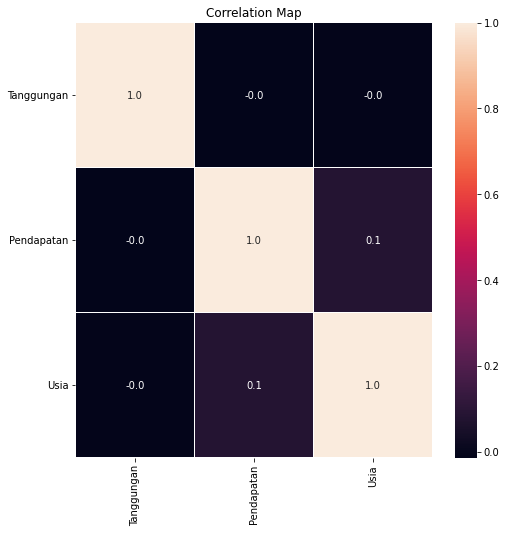

In [ ]:
f,ax=plt.subplots(figsize = (8,8))
# corr() is actually pearson correlation
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [ ]:
A = data[data["Status"] == "Bad"]
N = data[data["Status"] == "Good"]

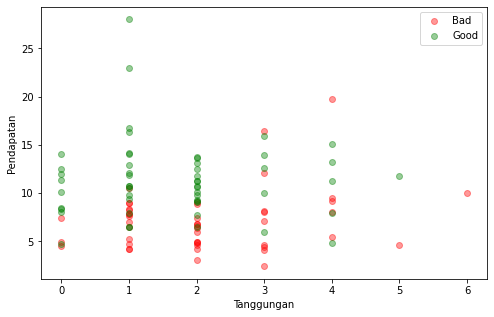

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(A.Tanggungan,A.Pendapatan,label= "Bad", color="red", alpha=0.4 )
plt.scatter(N.Tanggungan,N.Pendapatan, label = "Good", color="green", alpha=0.4)
plt.xlabel("Tanggungan")
plt.ylabel("Pendapatan")
plt.legend()
plt.show()

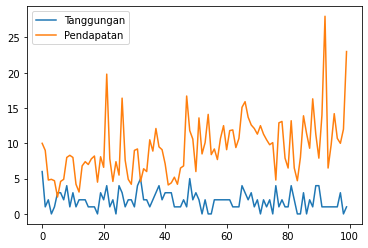

In [ ]:
plt.plot(data['Tanggungan'],label='Tanggungan')
plt.plot(data['Pendapatan'],label='Pendapatan')
plt.legend()

**Mengubah String Menajadi Integer**

In [ ]:
# Bad to 1
# Good to 0
data["Status"] = [1 if each == "Bad" else 0 for each in data["Status"]]
y = data["Status"].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
x_data = data.drop(["Status"], axis= 1)
x_data.head()

,Tanggungan,Pendapatan,Usia
0,6,10.0,39
1,1,9.0,49
2,2,4.8,35
3,0,4.9,52
4,1,4.7,34


**Normalisasi**

In [ ]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

**Sekarang kita akan menggunakan pengklasifikasi K-Nearest Neighbors untuk memprediksi rekor baru berdasarkan data ini. Untuk itu data akan dibagi menjadi set test dan train menggunakan library sklearn.**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [ ]:
x_train.describe()

,Tanggungan,Pendapatan,Usia
count,70.000000,70.000000,70.000000
mean,1.857143,9.290000,46.185714
std,1.310888,4.147189,8.574132
min,0.000000,2.400000,30.000000
25%,1.000000,6.000000,39.000000
50%,2.000000,9.000000,46.000000
75%,3.000000,11.800000,54.000000
max,6.000000,23.000000,60.000000


In [ ]:
x_test.describe()

,Tanggungan,Pendapatan,Usia
count,30.000000,30.000000,30.000000
mean,1.966667,9.613333,46.333333
std,1.272612,4.406479,8.222481
min,0.000000,4.200000,30.000000
25%,1.000000,7.000000,40.250000
50%,2.000000,9.000000,46.000000
75%,2.750000,10.500000,52.500000
max,5.000000,28.000000,60.000000


**Membuat classifier KNN untuk membuat prediksi dengan nilai Nearest Neighbor k = 3, 5, 7 dan 9.**

**Model KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.6333333333333333 


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(5,knn.score(x_test,y_test)))

 5 nn score: 0.6333333333333333 


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(7,knn.score(x_test,y_test)))

 7 nn score: 0.5666666666666667 


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.5666666666666667 


**Menemukan Nilai K Terbaik menggunakan Cross Fold Validation
dengan nilai k yaitu 20 fold**

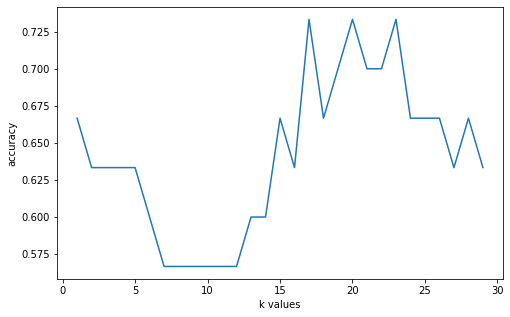

In [ ]:
score_list = []
for each in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.figure(figsize=(8,5))    
plt.plot(range(1,30),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(19, knn.score(x_test,y_test)))

 19 nn score: 0.7333333333333333 


**Kesimpulan**

Dari serangkaian proses yang dilalui dalam
penelitian ini yaitu Analisis Metode K Nearest
Neighbor Terhadap Klasifikasi Data Bad dan Good dengan total 100 data menggunakan nilai Nearest Neighbor k = 3, 5, 7 dan 9 serta
validasi data menggunakan Cross Fold Validation
dengan nilai k yaitu 20 fold memperoleh hasil yaitu :

1. Dari proses pertama yaitu klasifikasi K Nearest
Neighbor terhadap data Bad dan Good diperoleh hasil validasi terbaik
terdapat pada Nearest Neighbor k = 3 dan k = 5 dengan rata-rata akurasi sebesar 63.33%.
2. Sedangkan pada data uji akurasi tertinggi
diperoleh pada Nearest Neighbor k = 17 dengan
nilai akurasi 73.33%.